# Reto de Clasificación de Imágenes de Animales | Ruta N

## Contexto del reto a resolver

## Creación del ambiente virtual e instalación de dependencias

Lo primero es tener instalado Anaconda o Miniconda. Luego de eso abrir el terminal y crear un entorno virtual con la siguiente línea.

In [ ]:
%conda create -n RutaN python=3.9

Lo siguiente es activar el entorno virtual creado y luego instalar unas dependencias de NVidia para poder utilizar la GPU en el entrenamiento de los modelos.

In [ ]:
%conda activate RutaN
%conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

A continuación se instalan todas las dependencias necesarias.

In [1]:
%pip install tensorflow-gpu==2.10 numpy matplotlib pillow scipy opencv-python

  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 991.0 kB/s eta 0:00:39
   ---------------------------------------- 0.2/38.1 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.6/38.1 MB 4.7 MB/s eta 0:00:09
   - -------------------------------------- 1.0/38.1 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.1 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 1.9/38.1 MB 7.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.1 MB 7.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.1 MB 7.9 MB/s eta 0:00:05
   --- ------------

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Por último, se exporta a un archivo de texto las dependencias utilizadas para facilitar la instalación en el futuro.

In [ ]:
%pip freeze > requirements.txt

## Importación de paquetes

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Configura la asignación de memoria GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Limita la asignación de memoria a 1 GB
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
        )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "GPU física(s),", len(logical_gpus), "GPU(s) lógica(s)")
    except RuntimeError as e:
        print(e)

1 GPU física(s), 1 GPU(s) lógica(s)


## Trabajando con el dataset

Lo que haremos será crear una función para distribuir aleatoriamente las imágenes de las 5 clases en 3 carpetas: train, test y validation. Para la carpeta de train destinaremos el 70% de las imágenes; para validation el 10% y para test el 20% restante.

In [5]:
import os
import random
import shutil

def distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = None):
    """
    Distribuye copias aleatorias de imágenes desde una carpeta de origen a varias carpetas de destino
    según las proporciones especificadas.

    Args:
        carpeta_imagenes (str): Ruta de la carpeta que contiene las imágenes.
        carpetas_destino (list of str): Lista de rutas de las carpetas de destino.
        proporciones (list of int): Lista de proporciones para cada carpeta de destino en porcentaje.
        semilla (int): Semilla para el generador de números aleatorios (opcional).
    """
    if sum(proporciones) != 100:
        raise ValueError("Las proporciones deben sumar 100.")

    if semilla is not None:
        random.seed(semilla)

    archivos = os.listdir(carpeta_imagenes)
    total_archivos = 5200

    for i, carpeta_destino in enumerate(carpetas_destino):
        cantidad_archivos = total_archivos * proporciones[i] // 100

        # Crear la carpeta de destino si no existe
        os.makedirs(carpeta_destino, exist_ok=True)

        for _ in range(cantidad_archivos):
            archivo = random.choice(archivos)
            origen = os.path.join(carpeta_imagenes, archivo)
            destino = os.path.join(carpeta_destino, archivo)
            shutil.copy(origen, destino)

    print("Distribución de copias de imágenes completada.")

Comenzamos con las imágenes de los pájaros.

In [10]:

carpeta_imagenes = r"raw_dataset\birds"
carpetas_destino = [r"dataset\train\birds", r"dataset\test\birds", r"dataset\validation\birds"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Continuamos con los gatos.

In [11]:
carpeta_imagenes = r"raw_dataset\cat"
carpetas_destino = [r"dataset\train\cat", r"dataset\test\cat", r"dataset\validation\cat"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Los siguientes son los perros.

In [12]:
carpeta_imagenes = r"raw_dataset\dog"
carpetas_destino = [r"dataset\train\dog", r"dataset\test\dog", r"dataset\validation\dog"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Ahora los peces.

In [13]:
carpeta_imagenes = r"raw_dataset\fish"
carpetas_destino = [r"dataset\train\fish", r"dataset\test\fish", r"dataset\validation\fish"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Y por último los salvajes.

In [14]:
carpeta_imagenes = r"raw_dataset\wild"
carpetas_destino = [r"dataset\train\wild", r"dataset\test\wild", r"dataset\validation\wild"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


## Preprocesamiento de las imágenes

### Data Augmentation

In [11]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación de 40°
    rotation_range = 40,
    # Movimiento horizontal
    width_shift_range = 0.6,
    # Movimiento vertical
    height_shift_range = 0.35,
    # Cortar
    shear_range = 0.2,
    # Zoom
    zoom_range = 0.2,
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.4, 1.5]
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [12]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 64 imágenes
    batch_size = 64,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 64 imágenes
    batch_size = 64,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 64 imágenes
    batch_size = 64,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 13863 images belonging to 5 classes.
Found 2509 images belonging to 5 classes.
Found 4754 images belonging to 5 classes.


## Creación del Modelo

### Callbacks

In [14]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)

### Definición de la arquitectura

In [15]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.2))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.3))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.4))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.5))
# Agregamos una capa Densa con 512 neuronas y activación ReLu
model.add(Dense(512, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                      

### Compilación del modelo

In [16]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

## Entrenamiento del modelo

In [20]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    steps_per_epoch = 2600 // 64,
    # Entrenamos por 80 épocas
    epochs = 80,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/80

Epoch 1: val_accuracy did not improve from 0.83371
40/40 - 12s - loss: 0.6018 - accuracy: 0.7822 - val_loss: 1.1423 - val_accuracy: 0.6763 - 12s/epoch - 297ms/step
Epoch 2/80

Epoch 2: val_accuracy did not improve from 0.83371
40/40 - 12s - loss: 0.6270 - accuracy: 0.7625 - val_loss: 0.8054 - val_accuracy: 0.7455 - 12s/epoch - 292ms/step
Epoch 3/80

Epoch 3: val_accuracy did not improve from 0.83371
40/40 - 11s - loss: 0.5499 - accuracy: 0.7957 - val_loss: 0.4810 - val_accuracy: 0.8337 - 11s/epoch - 276ms/step
Epoch 4/80

Epoch 4: val_accuracy did not improve from 0.83371
40/40 - 11s - loss: 0.5693 - accuracy: 0.7812 - val_loss: 0.4882 - val_accuracy: 0.8002 - 11s/epoch - 273ms/step
Epoch 5/80

Epoch 5: val_accuracy did not improve from 0.83371
40/40 - 11s - loss: 0.5519 - accuracy: 0.7984 - val_loss: 1.0917 - val_accuracy: 0.6730 - 11s/epoch - 272ms/step
Epoch 6/80

Epoch 6: val_accuracy did not improve from 0.83371
40/40 - 11s - loss: 0.5818 - accuracy: 0.7949 - val_loss:

## Evaluación del modelo

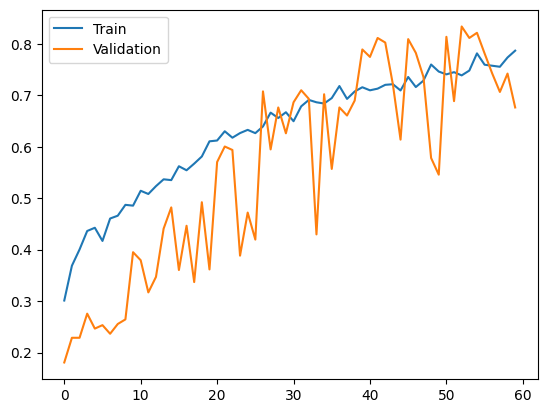

In [18]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [19]:
model.evaluate(testGenerator)

75/75 [==============================] - 54s 728ms/step - loss: 0.9970 - accuracy: 0.6950


[0.9970118999481201, 0.6949936747550964]

In [4]:
postModel = load_model(r"rutan_classification_2023-09-05.hdf5")
postModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                      

In [10]:
postModel.evaluate(testGenerator)

149/149 [==============================] - 69s 460ms/step - loss: 0.2127 - accuracy: 0.9327


[0.21273015439510345, 0.9326882362365723]

In [29]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [11]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = postModel.predict(imagen)
print(prediccion)
clases[np.argmax(prediccion)]

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step
[[8.8443887e-01 1.0047092e-02 1.8519139e-02 8.6256318e-02 7.3864550e-04]]


'Pájaro'

In [12]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = postModel.predict(imagen)
print(prediccion)
clases[np.argmax(prediccion)]

1/1 [==============================] - 0s 15ms/step
[[0.36891627 0.3604884  0.0599071  0.2082407  0.00244749]]


'Pájaro'

In [13]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = postModel.predict(imagen)
print(prediccion)
clases[np.argmax(prediccion)]

1/1 [==============================] - 0s 19ms/step
[[5.9718508e-03 2.0424721e-03 9.6032280e-01 2.1543949e-04 3.1447407e-02]]


'Perro'

In [14]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = postModel.predict(imagen)
print(prediccion)
clases[np.argmax(prediccion)]

1/1 [==============================] - 0s 18ms/step


[[0.8226355  0.04948292 0.08980748 0.03715308 0.00092107]]


'Pájaro'

In [15]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = postModel.predict(imagen)
print(prediccion)
clases[np.argmax(prediccion)]

1/1 [==============================] - 0s 17ms/step
[[0.13701811 0.02406658 0.35412067 0.00887014 0.47592443]]


'Salvaje'

## Segundo modelo propuesto

In [18]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación de 40°
    rotation_range = 40,
    # Movimiento horizontal
    width_shift_range = 0.6,
    # Movimiento vertical
    height_shift_range = 0.35,
    # Cortar
    shear_range = 0.2,
    # Zoom
    zoom_range = 0.2,
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.2, 1.8],
    # Cambia el color de los canales
    channel_shift_range = 10.0      
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [19]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 13863 images belonging to 5 classes.
Found 2509 images belonging to 5 classes.
Found 4754 images belonging to 5 classes.


In [9]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)
# callback para reducir la tasa de aprendizaje si la métrica de validación deja de mejorar
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss", 
    factor = 0.2, 
    patience = 5, 
    min_lr = 0.00001
)

In [10]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.2))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.2))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de convolución 5
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 256 kernels
        filters = 256, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.4))
# Agregamos una capa Densa con 256 neuronas y activación ReLu
model.add(Dense(256, activation = "relu"))
# Agregamos una capa Densa con 512 neuronas y activación ReLu
model.add(Dense(512, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

In [13]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint, reduce_lr],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    #steps_per_epoch = 2600 // 64,
    # Entrenamos por 100 épocas
    epochs = 100,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    #validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.30929, saving model to rutan_classification_2023-09-09.hdf5
434/434 - 257s - loss: 1.5897 - accuracy: 0.3250 - val_loss: 1.7015 - val_accuracy: 0.3093 - lr: 1.0000e-04 - 257s/epoch - 592ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.30929 to 0.34835, saving model to rutan_classification_2023-09-09.hdf5
434/434 - 55s - loss: 1.3980 - accuracy: 0.3960 - val_loss: 1.7941 - val_accuracy: 0.3483 - lr: 1.0000e-04 - 55s/epoch - 127ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.34835 to 0.37226, saving model to rutan_classification_2023-09-09.hdf5
434/434 - 55s - loss: 1.2995 - accuracy: 0.4524 - val_loss: 2.0869 - val_accuracy: 0.3723 - lr: 1.0000e-04 - 55s/epoch - 127ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.37226 to 0.43324, saving model to rutan_classification_2023-09-09.hdf5
434/434 - 55s - loss: 1.2174 - accuracy: 0.4921 - val_loss: 1.8201 - val_accuracy: 0.4332 - lr: 1.0000e-04 - 55s/epoc

* Se cambió el tamaño de los paquetes a 32
* Se agregó un callback para reducir el LR si el accuracy no mejora
* Se bajó la tasa de Dropout
* Se agregó una nueva capa de convolución con 256 kernels
* Se agregó una capa densa con 256 neuronas
* Se le especifió al optimizador Adam un LR de 0.0001
* Se eliminaron los parámetros de paso por época en el entrenamiento
* Se cambió la cantidad de épocas a 100

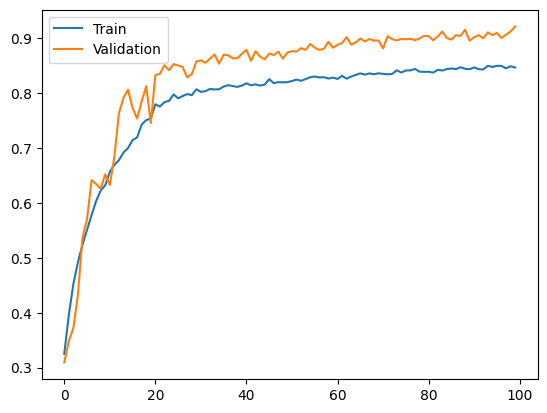

In [14]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [16]:
model_post = load_model(r"rutan_classification_2023-09-09.hdf5")

In [20]:
model_post.evaluate(testGenerator)

149/149 [==============================] - 71s 473ms/step - loss: 0.2187 - accuracy: 0.9188


[0.21865107119083405, 0.9188052415847778]

In [21]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 218ms/step
[[1.4363310e-01 8.7563787e-04 5.7189580e-04 8.5450387e-01 4.1555031e-04]]
Pez


In [22]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[6.8765581e-01 3.3598166e-04 2.9659934e-05 3.1189728e-01 8.1272752e-05]]
Pájaro


In [23]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step
[[2.9998267e-01 3.3044959e-03 6.4316916e-01 6.1767822e-04 5.2925963e-02]]
Perro


In [24]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[9.9903512e-01 5.7487890e-05 2.9950833e-04 5.9120316e-04 1.6695803e-05]]
Pájaro


In [25]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[9.3029708e-01 8.1343707e-03 6.3302374e-04 4.8297018e-02 1.2638479e-02]]
Pájaro


## Tercer modelo

In [27]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación de 40°
    rotation_range = 40,
    # Movimiento horizontal
    width_shift_range = 0.6,
    # Movimiento vertical
    height_shift_range = 0.35,
    # Cortar
    shear_range = 0.2,
    # Zoom
    zoom_range = 0.2,
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.2, 1.8],
    # Cambia el color de los canales
    channel_shift_range = 10.0      
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [28]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 13863 images belonging to 5 classes.
Found 2509 images belonging to 5 classes.
Found 4754 images belonging to 5 classes.


In [4]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)
# callback para reducir la tasa de aprendizaje si la métrica de validación deja de mejorar
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss", 
    factor = 0.2, 
    patience = 5, 
    min_lr = 0.00001
)

In [5]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 16 kernels
        filters = 16, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.2))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.2))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.4))
# Agregamos una capa Densa con 256 neuronas y activación ReLu
model.add(Dense(256, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

In [7]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint, reduce_lr],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    #steps_per_epoch = 2600 // 64,
    # Entrenamos por 100 épocas
    epochs = 100,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    #validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.37943, saving model to rutan_classification_2023-09-10.hdf5
434/434 - 320s - loss: 1.7726 - accuracy: 0.3198 - val_loss: 1.8281 - val_accuracy: 0.3794 - lr: 1.0000e-04 - 320s/epoch - 737ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.37943 to 0.41132, saving model to rutan_classification_2023-09-10.hdf5
434/434 - 55s - loss: 1.4086 - accuracy: 0.3809 - val_loss: 1.3228 - val_accuracy: 0.4113 - lr: 1.0000e-04 - 55s/epoch - 127ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.41132 to 0.47828, saving model to rutan_classification_2023-09-10.hdf5
434/434 - 55s - loss: 1.3432 - accuracy: 0.4218 - val_loss: 1.2003 - val_accuracy: 0.4783 - lr: 1.0000e-04 - 55s/epoch - 126ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.47828 to 0.52571, saving model to rutan_classification_2023-09-10.hdf5
434/434 - 55s - loss: 1.2725 - accuracy: 0.4593 - val_loss: 1.1448 - val_accuracy: 0.5257 - lr: 1.0000e-04 - 55s/epoc

* A cada convolución se le dividió por 2 el número de kernels
* Se eliminó la capa de convolución con 256 kernels
* Se eliminó la capa densa con 512 neuronas

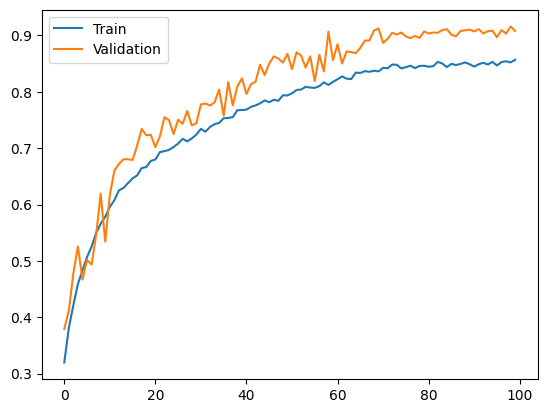

In [8]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [29]:
model_post = load_model(r"rutan_classification_2023-09-10.hdf5")

In [30]:
model_post.evaluate(testGenerator)

149/149 [==============================] - 9s 54ms/step - loss: 0.2144 - accuracy: 0.9222


[0.21444007754325867, 0.9221708178520203]

In [36]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step
[[9.7464097e-01 8.4308052e-04 2.1185563e-03 2.0345416e-02 2.0521113e-03]]
Pájaro


In [37]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step
[[8.7861309e-08 9.9998355e-01 1.4714254e-05 1.3774342e-06 2.3204420e-07]]
Gato


In [38]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[2.8780016e-06 8.6525446e-03 9.7565722e-01 4.2323238e-05 1.5645128e-02]]
Perro


In [39]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[1.2123559e-03 2.5261907e-04 4.6496384e-06 9.9840933e-01 1.2102085e-04]]
Pez


In [40]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[5.9411931e-03 2.3945041e-02 5.2808360e-03 6.5415379e-06 9.6482641e-01]]
Salvaje


## Cuarto modelo

In [25]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación
    rotation_range = 37,
    # Movimiento horizontal
    width_shift_range = [0.1, 0.3, 0.5, 0.9, 1.1, 1.3, 1.4, 1.6, 1.8],
    # Movimiento vertical
    height_shift_range = [0.1, 0.3, 0.5, 0.9, 1.1, 1.3, 1.4, 1.6, 1.8],
    # Cortar
    shear_range = 0.7,
    # Zoom
    zoom_range = [0.1, 0.5],
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.2, 1.8],
    # Cambia el color de los canales
    channel_shift_range = 10.0   
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [26]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 13863 images belonging to 5 classes.
Found 2509 images belonging to 5 classes.
Found 4754 images belonging to 5 classes.


In [27]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)
# callback para reducir la tasa de aprendizaje si la métrica de validación deja de mejorar
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss", 
    factor = 0.2, 
    patience = 5, 
    min_lr = 0.00001
)

In [28]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 16 kernels
        filters = 16, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.3))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.3))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.4))
# Agregamos una capa Densa con 256 neuronas y activación ReLu
model.add(Dense(256, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                      

In [29]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

In [30]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint, reduce_lr],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    #steps_per_epoch = 2600 // 64,
    # Entrenamos por 100 épocas
    epochs = 100,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    #validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.25389, saving model to rutan_classification_2023-09-12.hdf5
434/434 - 238s - loss: 1.7766 - accuracy: 0.3325 - val_loss: 4.0502 - val_accuracy: 0.2539 - lr: 1.0000e-04 - 238s/epoch - 549ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.25389 to 0.31527, saving model to rutan_classification_2023-09-12.hdf5
434/434 - 51s - loss: 1.3544 - accuracy: 0.4199 - val_loss: 2.0134 - val_accuracy: 0.3153 - lr: 1.0000e-04 - 51s/epoch - 119ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.31527
434/434 - 53s - loss: 1.2950 - accuracy: 0.4531 - val_loss: 1.9814 - val_accuracy: 0.3149 - lr: 1.0000e-04 - 53s/epoch - 121ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.31527
434/434 - 52s - loss: 1.2476 - accuracy: 0.4809 - val_loss: 2.1924 - val_accuracy: 0.3141 - lr: 1.0000e-04 - 52s/epoch - 120ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.31527
434/434 - 52s - loss: 1.2046 - accura

En la parte de Data Augmentation:
* La rotación cambió a 37°
* Se da un movimiento horizontal y vertical escogiendo valores aleatorios de una lista
* El zoom va de 0.1 a 0.5
* El brillo va de 0.2 a 1.8

Se aumentó un 10% la tasa de dropout

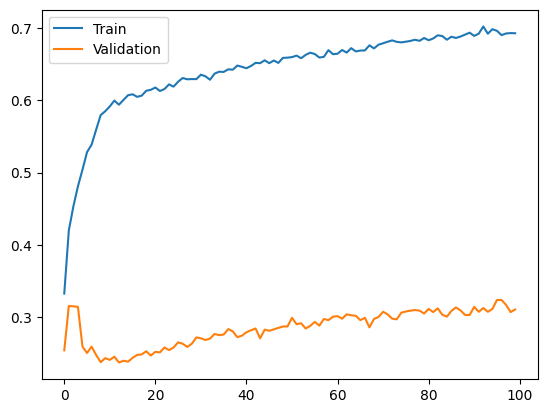

In [31]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [34]:
model_post = load_model(r"rutan_classification_2023-09-12.hdf5")

In [35]:
model_post.evaluate(testGenerator)

149/149 [==============================] - 71s 480ms/step - loss: 4.0169 - accuracy: 0.3168


[4.016890525817871, 0.31678587198257446]

In [38]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [39]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step


[[0.10377941 0.02244696 0.00366937 0.8645049  0.0055994 ]]
Pez


In [40]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 19ms/step
[[0.5851028  0.04891077 0.00079708 0.00763242 0.35755688]]
Pájaro


In [41]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 19ms/step
[[5.2647144e-01 3.3058805e-04 1.2775620e-04 4.7284207e-01 2.2819922e-04]]
Pájaro


In [42]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step
[[9.2669117e-01 2.6058815e-02 5.8611560e-05 4.5318827e-02 1.8725774e-03]]
Pájaro


In [43]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[9.2863165e-02 5.4871161e-02 4.7041759e-02 8.0509496e-01 1.2897910e-04]]
Pez


## Quinto modelo

In [2]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación
    rotation_range = 37,
    # Movimiento horizontal
    width_shift_range = [0.1, 0.3, 0.5, 0.9, 1.1, 1.3, 1.4, 1.6, 1.8],
    # Movimiento vertical
    height_shift_range = [0.1, 0.3, 0.5, 0.9, 1.1, 1.3, 1.4, 1.6, 1.8],
    # Cortar
    shear_range = 0.7,
    # Zoom
    zoom_range = [0.1, 0.5],
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.2, 1.8],
    # Cambia el color de los canales
    channel_shift_range = 10.0   
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [3]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 13863 images belonging to 5 classes.
Found 2509 images belonging to 5 classes.
Found 4754 images belonging to 5 classes.


In [4]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}-2.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)
# callback para reducir la tasa de aprendizaje si la métrica de validación deja de mejorar
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss", 
    factor = 0.2, 
    patience = 5, 
    min_lr = 0.00001
)

In [5]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.2))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.2))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de convolución 5
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 256 kernels
        filters = 256, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.4))
# Agregamos una capa Densa con 256 neuronas y activación ReLu
model.add(Dense(256, activation = "relu"))
# Agregamos una capa Densa con 512 neuronas y activación ReLu
model.add(Dense(512, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

In [7]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint, reduce_lr],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    #steps_per_epoch = 2600 // 64,
    # Entrenamos por 100 épocas
    epochs = 100,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    #validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.20327, saving model to rutan_classification_2023-09-12-2.hdf5
434/434 - 299s - loss: 1.5686 - accuracy: 0.3408 - val_loss: 4.6192 - val_accuracy: 0.2033 - lr: 1.0000e-04 - 299s/epoch - 689ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.20327 to 0.24950, saving model to rutan_classification_2023-09-12-2.hdf5
434/434 - 51s - loss: 1.3404 - accuracy: 0.4355 - val_loss: 2.0984 - val_accuracy: 0.2495 - lr: 1.0000e-04 - 51s/epoch - 117ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.24950
434/434 - 51s - loss: 1.2527 - accuracy: 0.4772 - val_loss: 2.7885 - val_accuracy: 0.2152 - lr: 1.0000e-04 - 51s/epoch - 117ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.24950
434/434 - 51s - loss: 1.1895 - accuracy: 0.5089 - val_loss: 3.6786 - val_accuracy: 0.2124 - lr: 1.0000e-04 - 51s/epoch - 118ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.24950
434/434 - 51s - loss: 1.1353 - ac

Se combinó el modelo 2 con el modelo 4

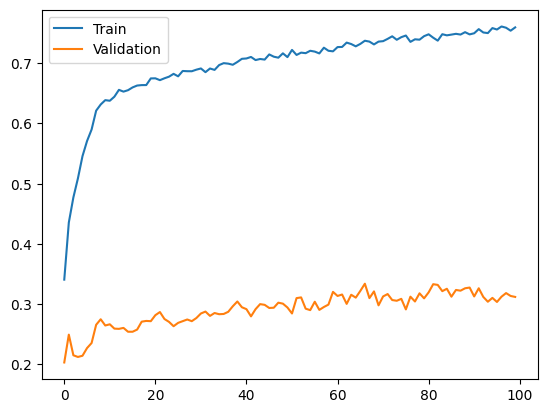

In [8]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [9]:
model_post = load_model(r"rutan_classification_2023-09-12-2.hdf5")

In [10]:
model_post.evaluate(testGenerator)

149/149 [==============================] - 70s 474ms/step - loss: 2.7173 - accuracy: 0.3235


[2.717273473739624, 0.3235170245170593]

In [12]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [13]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step


[[0.6491406  0.03308932 0.00463686 0.3072898  0.00584337]]
Pájaro


In [14]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[0.17517918 0.045475   0.01051624 0.76332015 0.00550943]]
Pez


In [15]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[0.83895    0.0057528  0.00372445 0.1505838  0.000989  ]]
Pájaro


In [16]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 19ms/step


[[9.5988953e-01 4.0135663e-03 1.2656387e-04 3.5718858e-02 2.5154106e-04]]
Pájaro


In [17]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[1.4039907e-01 6.5577298e-02 5.2372534e-02 7.4115282e-01 4.9833127e-04]]
Pez


## Sexto modelo

In [20]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación
    rotation_range = 37,
    # Movimiento horizontal
    width_shift_range = [0.1, 0.3, 0.5, 0.9, 1.1, 1.3, 1.4, 1.6, 1.8],
    # Movimiento vertical
    height_shift_range = [0.1, 0.3, 0.5, 0.9, 1.1, 1.3, 1.4, 1.6, 1.8],
    # Cortar
    shear_range = 0.7,
    # Zoom
    zoom_range = [0.1, 0.5],
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.2, 1.8],
    # Cambia el color de los canales
    channel_shift_range = 10.0   
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [21]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 13863 images belonging to 5 classes.
Found 2509 images belonging to 5 classes.
Found 4754 images belonging to 5 classes.


In [22]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}-3.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)
# callback para reducir la tasa de aprendizaje si la métrica de validación deja de mejorar
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss", 
    factor = 0.002, 
    patience = 8, 
    min_lr = 0.0001
)

In [23]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-6
        kernel_regularizer = regularizers.l2(1e-6),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-6
        kernel_regularizer = regularizers.l2(1e-6),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.3))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-6
        kernel_regularizer = regularizers.l2(1e-6),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.4))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.5))
# Agregamos una capa Densa con 128 neuronas y activación ReLu
model.add(Dense(128, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(learning_rate = 0.001),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

In [25]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint, reduce_lr],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    #steps_per_epoch = 2600 // 64,
    # Entrenamos por 100 épocas
    epochs = 100,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    #validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.22917, saving model to rutan_classification_2023-09-13-3.hdf5
434/434 - 53s - loss: 1.7255 - accuracy: 0.3192 - val_loss: 3.6203 - val_accuracy: 0.2292 - lr: 0.0010 - 53s/epoch - 123ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.22917 to 0.23475, saving model to rutan_classification_2023-09-13-3.hdf5
434/434 - 52s - loss: 1.4040 - accuracy: 0.3739 - val_loss: 2.2548 - val_accuracy: 0.2348 - lr: 0.0010 - 52s/epoch - 121ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.23475 to 0.31327, saving model to rutan_classification_2023-09-13-3.hdf5
434/434 - 53s - loss: 1.3173 - accuracy: 0.4367 - val_loss: 1.9921 - val_accuracy: 0.3133 - lr: 0.0010 - 53s/epoch - 123ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.31327
434/434 - 53s - loss: 1.2384 - accuracy: 0.4891 - val_loss: 4.1125 - val_accuracy: 0.2116 - lr: 0.0010 - 53s/epoch - 121ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from

Se utilizó una arquitectura con solo 3 convoluciones.

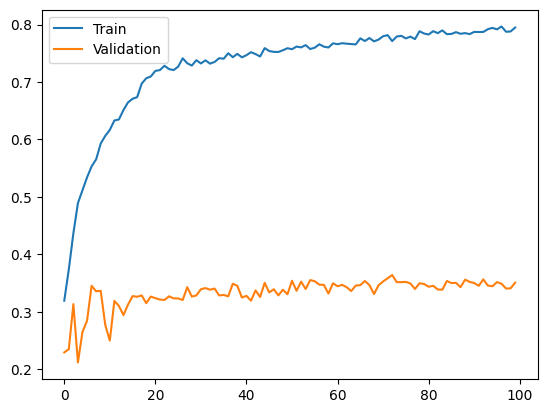

In [26]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [27]:
model_post = load_model(r"rutan_classification_2023-09-13-3.hdf5")

In [28]:
model_post.evaluate(testGenerator)

149/149 [==============================] - 89s 596ms/step - loss: 0.6088 - accuracy: 0.7783


[0.6088295578956604, 0.7782919406890869]

In [30]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 313ms/step
[[0.35825816 0.0234885  0.01023244 0.6068843  0.0011366 ]]
Pez


In [31]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 20ms/step
[[4.0749431e-02 2.2190879e-04 4.8834871e-04 9.5829242e-01 2.4793661e-04]]
Pez


In [32]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 19ms/step
[[9.9061769e-01 1.5192700e-03 1.2134547e-04 7.6618451e-03 7.9817437e-05]]
Pájaro


In [33]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[9.9693382e-01 9.9399585e-06 7.3719679e-07 3.0537476e-03 1.6690356e-06]]
Pájaro


In [34]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 17ms/step
[[0.5548262  0.23070703 0.0645638  0.134657   0.01524595]]
Pájaro


## Séptimo modelo

Se amplió el conjunto de datos a través de datasets de Kaggle:

https://www.kaggle.com/datasets/markdaniellampa/fish-dataset
https://www.kaggle.com/datasets/dmcgow/birds-200
https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification
https://www.kaggle.com/datasets/sripaadsrinivasan/fish-species-image-data
https://www.kaggle.com/datasets/virtualdvid/oregon-wildlife
https://www.kaggle.com/datasets/e7b37e1df7b867f5c92eba2186fe56513fc13fde518beb1cecb2dbf521e93826
https://www.kaggle.com/datasets/chetankv/dogs-cats-images
https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset


Lo primero que haremos será eliminar las imágenes duplicadas.

In [2]:
import cv2
import hashlib
import os

def eliminar_imagenes_duplicadas(directorios_imagenes):
    # Diccionario para almacenar hashes y nombres de archivos
    hashes = {}

    # Lista para almacenar las imágenes duplicadas
    imagenes_duplicadas = []

    # Función para calcular el hash de una imagen
    def calcular_hash(imagen_path, tamano=8):
        with open(imagen_path, 'rb') as f:
            imagen_data = f.read()
        return hashlib.md5(imagen_data).hexdigest()[:tamano]

    for directorio_imagenes in directorios_imagenes:
        # Recorre el directorio de imágenes
        for root, dirs, files in os.walk(directorio_imagenes):
            for archivo in files:
                imagen_path = os.path.join(root, archivo)
                if os.path.isfile(imagen_path):
                    # Calcula el hash de la imagen
                    h = calcular_hash(imagen_path)
                    
                    # Si el hash ya existe en el diccionario, entonces es una imagen duplicada
                    if h in hashes:
                        print(f"Imagen duplicada encontrada: {imagen_path} (Hash: {h})")
                        imagenes_duplicadas.append(imagen_path)
                    else:
                        hashes[h] = imagen_path

    # Elimina las imágenes duplicadas
    for imagen_duplicada in imagenes_duplicadas:
        os.remove(imagen_duplicada)
        print(f"Imagen duplicada eliminada: {imagen_duplicada}")

    print("Proceso completado. Imágenes duplicadas eliminadas.")


In [3]:
directorios_imagenes = [r"raw_dataset2\birds", r"raw_dataset2\cat", r"raw_dataset2\dog", r"raw_dataset2\fish", r"raw_dataset2\wild"]
eliminar_imagenes_duplicadas(directorios_imagenes)

Imagen duplicada encontrada: raw_dataset2\birds\0 (11).jpg (Hash: c9703b14)
Imagen duplicada encontrada: raw_dataset2\birds\0 (19).jpg (Hash: 634bc992)
Imagen duplicada encontrada: raw_dataset2\birds\0 (2).jpg (Hash: 634bc992)
Imagen duplicada encontrada: raw_dataset2\birds\0 (3).jpg (Hash: a1977caf)
Imagen duplicada encontrada: raw_dataset2\birds\0 (4).jpg (Hash: 80235265)
Imagen duplicada encontrada: raw_dataset2\birds\0 (5).jpg (Hash: c43c5c03)
Imagen duplicada encontrada: raw_dataset2\birds\0 (6).jpg (Hash: 3546b3d6)
Imagen duplicada encontrada: raw_dataset2\birds\0 (7).jpg (Hash: 48906afa)
Imagen duplicada encontrada: raw_dataset2\birds\0 (8).jpg (Hash: eca479bf)
Imagen duplicada encontrada: raw_dataset2\birds\0 (9).jpg (Hash: 4c671f01)
Imagen duplicada encontrada: raw_dataset2\birds\0 (90).jpg (Hash: 1920a8a2)
Imagen duplicada encontrada: raw_dataset2\birds\0 (91).jpg (Hash: 3b1012a8)
Imagen duplicada encontrada: raw_dataset2\birds\0 (92).jpg (Hash: 018954b8)
Imagen duplicada enc

Una vez eliminadas las imágenes duplicadas continuaremos con la distribución de las mismas.

In [7]:
import os
import random
import shutil

def distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = None):
    """
    Distribuye copias aleatorias de imágenes desde una carpeta de origen a varias carpetas de destino
    según las proporciones especificadas.

    Args:
        carpeta_imagenes (str): Ruta de la carpeta que contiene las imágenes.
        carpetas_destino (list of str): Lista de rutas de las carpetas de destino.
        proporciones (list of int): Lista de proporciones para cada carpeta de destino en porcentaje.
        semilla (int): Semilla para el generador de números aleatorios (opcional).
    """
    if sum(proporciones) != 100:
        raise ValueError("Las proporciones deben sumar 100.")

    if semilla is not None:
        random.seed(semilla)

    archivos = os.listdir(carpeta_imagenes)
    total_archivos = len(archivos)

    for i, carpeta_destino in enumerate(carpetas_destino):
        cantidad_archivos = total_archivos * proporciones[i] // 100

        # Crear la carpeta de destino si no existe
        os.makedirs(carpeta_destino, exist_ok=True)

        for _ in range(cantidad_archivos):
            archivo = random.choice(archivos)
            origen = os.path.join(carpeta_imagenes, archivo)
            destino = os.path.join(carpeta_destino, archivo)
            shutil.copy(origen, destino)

    print("Distribución de copias de imágenes completada.")

Comenzamos con las imágenes de los pájaros.

In [8]:
carpeta_imagenes = r"raw_dataset2\birds"
carpetas_destino = [r"dataset2\train\birds", r"dataset2\test\birds", r"dataset2\validation\birds"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Continuamos con los gatos.

In [9]:
carpeta_imagenes = r"raw_dataset2\cat"
carpetas_destino = [r"dataset2\train\cat", r"dataset2\test\cat", r"dataset2\validation\cat"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Los siguientes son los perros.

In [10]:
carpeta_imagenes = r"raw_dataset2\dog"
carpetas_destino = [r"dataset2\train\dog", r"dataset2\test\dog", r"dataset2\validation\dog"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Ahora los peces.

In [11]:
carpeta_imagenes = r"raw_dataset2\fish"
carpetas_destino = [r"dataset2\train\fish", r"dataset2\test\fish", r"dataset2\validation\fish"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Y por último los salvajes.

In [12]:
carpeta_imagenes = r"raw_dataset2\wild"
carpetas_destino = [r"dataset2\train\wild", r"dataset2\test\wild", r"dataset2\validation\wild"]
proporciones = [70, 20, 10]
semilla = 42
distribuir_imagenes(carpeta_imagenes, carpetas_destino, proporciones, semilla = semilla)

Distribución de copias de imágenes completada.


Verificar que las imágenes no estén corruptas y se puedan abrir

In [ ]:
import os
import cv2
bad_list=[]
dir=r'dataset2'
subdir_list=os.listdir(dir) # create a list of the sub directories in the directory ie train or test
for d in subdir_list:  # iterate through the sub directories train and test
    dpath=os.path.join (dir, d) # create path to sub directory
    if d in ['test', 'train', "validation"]:
        class_list=os.listdir(dpath) # list of classes ie dog or cat
       # print (class_list)
        for klass in class_list: # iterate through the two classes
            class_path=os.path.join(dpath, klass) # path to class directory
            #print(class_path)
            file_list=os.listdir(class_path) # create list of files in class directory
            for f in file_list: # iterate through the files
                fpath=os.path.join (class_path,f)
                index=f.rfind('.') # find index of period infilename
                ext=f[index+1:] # get the files extension
                if ext  not in ['jpg', 'png', 'bmp', 'gif']:
                    print(f'file {fpath}  has an invalid extension {ext}')
                    bad_list.append(fpath)                    
                else:
                    try:
                        img=cv2.imread(fpath)
                        size=img.shape
                    except:
                        print(f'file {fpath} is not a valid image file ')
                        bad_list.append(fpath)
                       
print (bad_list)

[]


In [ ]:
for i in bad_list:
    os.remove(i)

Utilizaremos el cuarto modelo y lo entrenaremos con el nuevo dataset

In [17]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación
    rotation_range = 30,
    # Movimiento horizontal
    width_shift_range = [0.1, 0.5, 1.1, 1.5],
    # Movimiento vertical
    height_shift_range = [0.1, 0.5, 1.1, 1.5],
    # Cortar
    shear_range = 0.5,
    # Zoom
    zoom_range = [0.1, 0.5],
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
    # Cambiar el brillo
    brightness_range = [0.2, 1.4],
    # Cambia el color de los canales
    channel_shift_range = 5.0   
)

# Creamos un generador de imágenes para Test y Validation simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

In [18]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory(r"dataset2/train",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory(r"dataset2/validation",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory(r"dataset2/test",
    # Tamaño de las imágenes
    target_size = (128, 128),
    # Paquetes de a 32 imágenes
    batch_size = 32,
    # Clasificación múltiples
    class_mode = "categorical"
)

Found 46290 images belonging to 5 classes.
Found 8740 images belonging to 5 classes.
Found 16598 images belonging to 5 classes.


In [19]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)


In [20]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 16 kernels
        filters = 16, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 128 pixeles con 3 canales
        input_shape = (128, 128, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.3))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.3))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.3))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.4))
# Agregamos una capa Densa con 256 neuronas y activación ReLu
model.add(Dense(256, activation = "relu"))
# Agregamos la capa encargada de la clasificación múltiple con activación Softmax
model.add(Dense(5, activation = "softmax"))

# Resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                      

In [21]:
model.compile(
    # Función de pérdida Categorical Cross Entropy
    loss = "categorical_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(learning_rate = 0.001),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

In [22]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    #steps_per_epoch = 2600 // 64,
    # Entrenamos por 100 épocas
    epochs = 100,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    #validation_steps = 930 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/100


d:\anaconda3\envs\RutaN\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
d:\anaconda3\envs\RutaN\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))



Epoch 1: val_accuracy improved from -inf to 0.22723, saving model to rutan_classification_2023-09-14.hdf5
1447/1447 - 192s - loss: 1.5105 - accuracy: 0.3492 - val_loss: 3.0090 - val_accuracy: 0.2272 - 192s/epoch - 133ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.22723 to 0.35503, saving model to rutan_classification_2023-09-14.hdf5
1447/1447 - 185s - loss: 1.3592 - accuracy: 0.4077 - val_loss: 1.5231 - val_accuracy: 0.3550 - 185s/epoch - 128ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.35503 to 0.35938, saving model to rutan_classification_2023-09-14.hdf5
1447/1447 - 185s - loss: 1.3030 - accuracy: 0.4450 - val_loss: 1.5435 - val_accuracy: 0.3594 - 185s/epoch - 128ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.35938
1447/1447 - 179s - loss: 1.2589 - accuracy: 0.4677 - val_loss: 1.6213 - val_accuracy: 0.3484 - 179s/epoch - 124ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.35938
1447/1447 - 179s - loss: 1.2184 - accuracy: 0

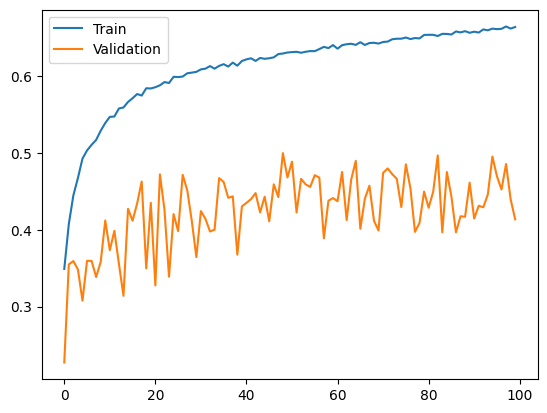

In [23]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [24]:
model_post = load_model(r"rutan_classification_2023-09-14.hdf5")

In [25]:
model_post.evaluate(testGenerator)

432/519 [=======================>......] - ETA: 50s - loss: 1.3833 - accuracy: 0.4976

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


519/519 [==============================] - 293s 565ms/step - loss: 1.3798 - accuracy: 0.4992


[1.3798234462738037, 0.49915653467178345]

In [26]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [27]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 490ms/step
[[0.30009368 0.00442673 0.01632012 0.6513138  0.02784568]]
Pez


In [28]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[0.27872938 0.10970893 0.20990919 0.15307434 0.24857818]]
Pájaro


In [29]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step
[[1.6228860e-02 3.4297386e-04 8.4966069e-01 9.8439353e-04 1.3278310e-01]]
Perro


In [30]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[0.64441365 0.00253109 0.11403731 0.02549792 0.21352   ]]
Pájaro


In [31]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 15ms/step
[[0.6379325  0.03401011 0.04323059 0.05463828 0.23018853]]
Pájaro


## Octavo Modelo

In [21]:
import datetime
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Directorios de datos
train_dir = "dataset2/train"
validation_dir = "dataset2/validation"
test_dir = "dataset2/test"

# Data augmentation para entrenamiento
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest",
    brightness_range = [0.2, 1.4],
    channel_shift_range = 5.0
)

# Preprocesamiento para validación y prueba
validation_datagen = ImageDataGenerator(rescale =1. / 255)
test_datagen = ImageDataGenerator(rescale =1. / 255)

# Generadores de datos
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = 'categorical'
)


Found 46290 images belonging to 5 classes.
Found 8740 images belonging to 5 classes.
Found 16598 images belonging to 5 classes.


In [22]:
# Carga el modelo pre-entrenado ResNet-50
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (128, 128, 3))

# Construye el modelo personalizado
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

# Compila el modelo
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

# Resumen del modelo
model.summary()

94765736/94765736 [==============================] - 8s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_40 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_73 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_93 (Dropout)        (None, 256)               0         
                                                      

In [23]:
# Entrenamiento del modelo
checkpoint = ModelCheckpoint(
    f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose = 1,
    monitor = "val_accuracy",
    save_best_only = True,
    mode = 'max'
)

epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    callbacks = [checkpoint],
    verbose = 2,
    shuffle = True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.57807, saving model to rutan_classification_2023-09-15.hdf5
1446/1446 - 247s - loss: 1.2783 - accuracy: 0.5438 - val_loss: 1.3459 - val_accuracy: 0.5781 - 247s/epoch - 171ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.57807 to 0.72218, saving model to rutan_classification_2023-09-15.hdf5
1446/1446 - 204s - loss: 0.7941 - accuracy: 0.7089 - val_loss: 0.8085 - val_accuracy: 0.7222 - 204s/epoch - 141ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.72218
1446/1446 - 199s - loss: 0.5952 - accuracy: 0.7804 - val_loss: 1.2843 - val_accuracy: 0.5283 - 199s/epoch - 138ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.72218
1446/1446 - 189s - loss: 0.5323 - accuracy: 0.8055 - val_loss: 1.4004 - val_accuracy: 0.5312 - 189s/epoch - 131ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.72218
1446/1446 - 199s - loss: 0.4839 - accuracy: 0.8237 - val_loss: 0.8786 - val_accuracy: 0.714

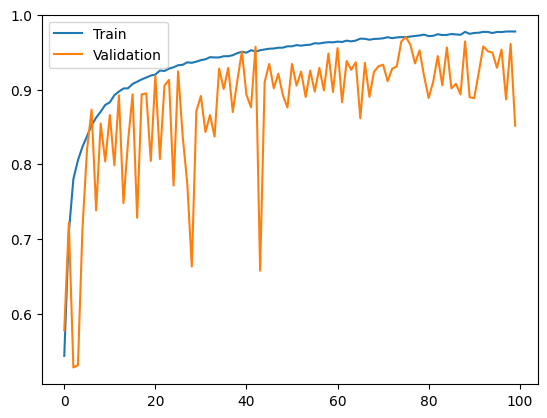

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


519/519 - 318s - loss: 0.6114 - accuracy: 0.8440 - 318s/epoch - 614ms/step
Accuracy en el conjunto de prueba: 84.40%


In [24]:
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

# Evaluación del modelo en el conjunto de prueba}
test_loss, test_accuracy = model.evaluate(test_generator, verbose = 2)
print(f'Accuracy en el conjunto de prueba: {test_accuracy * 100:.2f}%')

In [25]:
model_post = load_model(r"rutan_classification_2023-09-15.hdf5")

In [ ]:
model_post.evaluate(testGenerator)

519/519 [==============================] - 31s 57ms/step - loss: 0.0995 - accuracy: 0.9667


[0.09951119869947433, 0.966742992401123]

In [27]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [28]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 1s 1s/step
[[7.3450941e-01 4.6062915e-04 1.7100686e-04 3.4398850e-02 2.3046003e-01]]
Pájaro


In [29]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 17ms/step
[[3.1390218e-03 5.8903998e-01 6.9023417e-03 1.1306067e-04 4.0080568e-01]]
Gato


In [30]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[4.3818620e-08 4.4846948e-09 9.9999976e-01 5.4325155e-10 2.1894334e-07]]
Perro


In [31]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 21ms/step
[[4.4429114e-01 1.7812298e-04 2.6329127e-03 1.3062708e-01 4.2227075e-01]]
Pájaro


In [32]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[4.3456029e-07 5.5788109e-07 5.9404374e-07 4.8011545e-10 9.9999845e-01]]
Salvaje


## Noveno modelo

In [16]:
import datetime
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Directorios de datos
train_dir = "dataset2/train"
validation_dir = "dataset2/validation"
test_dir = "dataset2/test"

# Data augmentation para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    brightness_range=[0.2, 1.4],
    channel_shift_range=5.0
)

# Preprocesamiento para validación y prueba
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generadores de datos
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 46290 images belonging to 5 classes.
Found 8740 images belonging to 5 classes.
Found 16598 images belonging to 5 classes.


In [17]:
# Carga el modelo pre-entrenado MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Construye el modelo personalizado
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compila el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 256)               0 

In [18]:
# Entrenamiento del modelo
checkpoint = ModelCheckpoint(
    f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose=1,
    monitor="val_accuracy",
    save_best_only=True,
    mode='max'
)

epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint],
    verbose=2,
    shuffle=True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.71795, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 195s - loss: 0.5260 - accuracy: 0.8182 - val_loss: 1.8291 - val_accuracy: 0.7179 - 195s/epoch - 135ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.71795 to 0.74233, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 190s - loss: 0.3722 - accuracy: 0.8682 - val_loss: 1.3779 - val_accuracy: 0.7423 - 190s/epoch - 132ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.74233 to 0.83219, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 189s - loss: 0.3329 - accuracy: 0.8827 - val_loss: 0.7253 - val_accuracy: 0.8322 - 189s/epoch - 131ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.83219
1446/1446 - 190s - loss: 0.3100 - accuracy: 0.8898 - val_loss: 1.6237 - val_accuracy: 0.7376 - 190s/epoch - 131ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.83219
1446/1446 - 192s - loss: 0.2901 -

KeyboardInterrupt: 

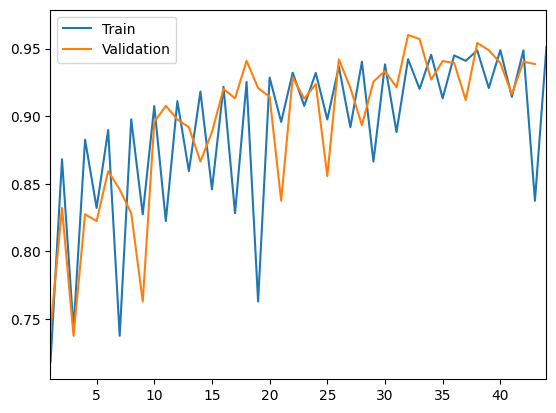

In [ ]:
import re

texto = """
Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.71795, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 195s - loss: 0.5260 - accuracy: 0.8182 - val_loss: 1.8291 - val_accuracy: 0.7179 - 195s/epoch - 135ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.71795 to 0.74233, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 190s - loss: 0.3722 - accuracy: 0.8682 - val_loss: 1.3779 - val_accuracy: 0.7423 - 190s/epoch - 132ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.74233 to 0.83219, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 189s - loss: 0.3329 - accuracy: 0.8827 - val_loss: 0.7253 - val_accuracy: 0.8322 - 189s/epoch - 131ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.83219
1446/1446 - 190s - loss: 0.3100 - accuracy: 0.8898 - val_loss: 1.6237 - val_accuracy: 0.7376 - 190s/epoch - 131ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.83219
1446/1446 - 192s - loss: 0.2901 - accuracy: 0.8977 - val_loss: 0.6590 - val_accuracy: 0.8275 - 192s/epoch - 133ms/step
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.83219
1446/1446 - 189s - loss: 0.2652 - accuracy: 0.9075 - val_loss: 0.5875 - val_accuracy: 0.8225 - 189s/epoch - 130ms/step
Epoch 7/100

Epoch 7: val_accuracy improved from 0.83219 to 0.85943, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 190s - loss: 0.2541 - accuracy: 0.9112 - val_loss: 0.5564 - val_accuracy: 0.8594 - 190s/epoch - 131ms/step
Epoch 8/100

Epoch 8: val_accuracy did not improve from 0.85943
1446/1446 - 191s - loss: 0.2319 - accuracy: 0.9183 - val_loss: 0.6358 - val_accuracy: 0.8459 - 191s/epoch - 132ms/step
Epoch 9/100

Epoch 9: val_accuracy did not improve from 0.85943
1446/1446 - 191s - loss: 0.2264 - accuracy: 0.9218 - val_loss: 0.6416 - val_accuracy: 0.8283 - 191s/epoch - 132ms/step
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.85943
1446/1446 - 190s - loss: 0.2113 - accuracy: 0.9254 - val_loss: 1.4609 - val_accuracy: 0.7630 - 190s/epoch - 132ms/step
Epoch 11/100

Epoch 11: val_accuracy improved from 0.85943 to 0.89583, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 190s - loss: 0.2033 - accuracy: 0.9286 - val_loss: 0.3450 - val_accuracy: 0.8958 - 190s/epoch - 132ms/step
Epoch 12/100

Epoch 12: val_accuracy improved from 0.89583 to 0.90774, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 192s - loss: 0.1945 - accuracy: 0.9322 - val_loss: 0.2729 - val_accuracy: 0.9077 - 192s/epoch - 133ms/step
Epoch 13/100

Epoch 13: val_accuracy did not improve from 0.90774
1446/1446 - 188s - loss: 0.1917 - accuracy: 0.9321 - val_loss: 0.3064 - val_accuracy: 0.8976 - 188s/epoch - 130ms/step
Epoch 14/100

Epoch 14: val_accuracy did not improve from 0.90774
1446/1446 - 191s - loss: 0.1791 - accuracy: 0.9368 - val_loss: 0.3533 - val_accuracy: 0.8919 - 191s/epoch - 132ms/step
Epoch 15/100

Epoch 15: val_accuracy did not improve from 0.90774
1446/1446 - 189s - loss: 0.1717 - accuracy: 0.9403 - val_loss: 0.4198 - val_accuracy: 0.8665 - 189s/epoch - 131ms/step
Epoch 16/100

Epoch 16: val_accuracy did not improve from 0.90774
1446/1446 - 188s - loss: 0.1728 - accuracy: 0.9384 - val_loss: 0.3132 - val_accuracy: 0.8883 - 188s/epoch - 130ms/step
Epoch 17/100

Epoch 17: val_accuracy improved from 0.90774 to 0.92022, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 191s - loss: 0.1637 - accuracy: 0.9422 - val_loss: 0.2373 - val_accuracy: 0.9202 - 191s/epoch - 132ms/step
Epoch 18/100

Epoch 18: val_accuracy did not improve from 0.92022
1446/1446 - 189s - loss: 0.1568 - accuracy: 0.9455 - val_loss: 0.2825 - val_accuracy: 0.9133 - 189s/epoch - 131ms/step
Epoch 19/100

Epoch 19: val_accuracy improved from 0.92022 to 0.94105, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 191s - loss: 0.1606 - accuracy: 0.9450 - val_loss: 0.1705 - val_accuracy: 0.9410 - 191s/epoch - 132ms/step
Epoch 20/100

Epoch 20: val_accuracy did not improve from 0.94105
1446/1446 - 188s - loss: 0.1472 - accuracy: 0.9487 - val_loss: 0.2267 - val_accuracy: 0.9209 - 188s/epoch - 130ms/step
Epoch 21/100

Epoch 21: val_accuracy did not improve from 0.94105
1446/1446 - 189s - loss: 0.1441 - accuracy: 0.9489 - val_loss: 0.2527 - val_accuracy: 0.9143 - 189s/epoch - 131ms/step
Epoch 22/100

Epoch 22: val_accuracy did not improve from 0.94105
1446/1446 - 189s - loss: 0.1438 - accuracy: 0.9487 - val_loss: 0.5432 - val_accuracy: 0.8375 - 189s/epoch - 130ms/step
Epoch 23/100

Epoch 23: val_accuracy did not improve from 0.94105
1446/1446 - 190s - loss: 0.1385 - accuracy: 0.9517 - val_loss: 0.2069 - val_accuracy: 0.9287 - 190s/epoch - 131ms/step
Epoch 24/100

Epoch 24: val_accuracy did not improve from 0.94105
1446/1446 - 189s - loss: 0.1356 - accuracy: 0.9519 - val_loss: 0.2522 - val_accuracy: 0.9130 - 189s/epoch - 131ms/step
Epoch 25/100

Epoch 25: val_accuracy did not improve from 0.94105
1446/1446 - 191s - loss: 0.1360 - accuracy: 0.9519 - val_loss: 0.2351 - val_accuracy: 0.9238 - 191s/epoch - 132ms/step
Epoch 26/100

Epoch 26: val_accuracy did not improve from 0.94105
1446/1446 - 192s - loss: 0.1292 - accuracy: 0.9556 - val_loss: 0.4852 - val_accuracy: 0.8557 - 192s/epoch - 133ms/step
Epoch 27/100

Epoch 27: val_accuracy improved from 0.94105 to 0.94208, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 193s - loss: 0.1287 - accuracy: 0.9546 - val_loss: 0.1663 - val_accuracy: 0.9421 - 193s/epoch - 133ms/step
Epoch 28/100

Epoch 28: val_accuracy did not improve from 0.94208
1446/1446 - 189s - loss: 0.1245 - accuracy: 0.9567 - val_loss: 0.2455 - val_accuracy: 0.9210 - 189s/epoch - 131ms/step
Epoch 29/100

Epoch 29: val_accuracy did not improve from 0.94208
1446/1446 - 190s - loss: 0.1266 - accuracy: 0.9549 - val_loss: 0.3350 - val_accuracy: 0.8933 - 190s/epoch - 131ms/step
Epoch 30/100

Epoch 30: val_accuracy did not improve from 0.94208
1446/1446 - 190s - loss: 0.1188 - accuracy: 0.9573 - val_loss: 0.2103 - val_accuracy: 0.9256 - 190s/epoch - 131ms/step
Epoch 31/100

Epoch 31: val_accuracy did not improve from 0.94208
1446/1446 - 220s - loss: 0.1199 - accuracy: 0.9584 - val_loss: 0.1996 - val_accuracy: 0.9334 - 220s/epoch - 152ms/step
Epoch 32/100

Epoch 32: val_accuracy did not improve from 0.94208
1446/1446 - 336s - loss: 0.1143 - accuracy: 0.9588 - val_loss: 0.2398 - val_accuracy: 0.9214 - 336s/epoch - 232ms/step
Epoch 33/100

Epoch 33: val_accuracy improved from 0.94208 to 0.96005, saving model to rutan_classification_2023-09-16.hdf5
1446/1446 - 192s - loss: 0.1170 - accuracy: 0.9595 - val_loss: 0.1164 - val_accuracy: 0.9601 - 192s/epoch - 133ms/step
Epoch 34/100

Epoch 34: val_accuracy did not improve from 0.96005
1446/1446 - 190s - loss: 0.1129 - accuracy: 0.9596 - val_loss: 0.1243 - val_accuracy: 0.9571 - 190s/epoch - 132ms/step
Epoch 35/100

Epoch 35: val_accuracy did not improve from 0.96005
1446/1446 - 189s - loss: 0.1090 - accuracy: 0.9608 - val_loss: 0.2242 - val_accuracy: 0.9271 - 189s/epoch - 131ms/step
Epoch 36/100

Epoch 36: val_accuracy did not improve from 0.96005
1446/1446 - 190s - loss: 0.1105 - accuracy: 0.9607 - val_loss: 0.1718 - val_accuracy: 0.9408 - 190s/epoch - 131ms/step
Epoch 37/100

Epoch 37: val_accuracy did not improve from 0.96005
1446/1446 - 189s - loss: 0.1049 - accuracy: 0.9630 - val_loss: 0.1744 - val_accuracy: 0.9394 - 189s/epoch - 131ms/step
Epoch 38/100

Epoch 38: val_accuracy did not improve from 0.96005
1446/1446 - 189s - loss: 0.1068 - accuracy: 0.9616 - val_loss: 0.3080 - val_accuracy: 0.9120 - 189s/epoch - 131ms/step
Epoch 39/100

Epoch 39: val_accuracy did not improve from 0.96005
1446/1446 - 196s - loss: 0.1009 - accuracy: 0.9641 - val_loss: 0.1255 - val_accuracy: 0.9542 - 196s/epoch - 135ms/step
Epoch 40/100

Epoch 40: val_accuracy did not improve from 0.96005
1446/1446 - 197s - loss: 0.1016 - accuracy: 0.9637 - val_loss: 0.1524 - val_accuracy: 0.9489 - 197s/epoch - 136ms/step
Epoch 41/100

Epoch 41: val_accuracy did not improve from 0.96005
1446/1446 - 192s - loss: 0.1012 - accuracy: 0.9640 - val_loss: 0.1782 - val_accuracy: 0.9394 - 192s/epoch - 133ms/step
Epoch 42/100

Epoch 42: val_accuracy did not improve from 0.96005
1446/1446 - 189s - loss: 0.0982 - accuracy: 0.9649 - val_loss: 0.2919 - val_accuracy: 0.9163 - 189s/epoch - 131ms/step
Epoch 43/100

Epoch 43: val_accuracy did not improve from 0.96005
1446/1446 - 190s - loss: 0.0930 - accuracy: 0.9664 - val_loss: 0.1687 - val_accuracy: 0.9404 - 190s/epoch - 131ms/step
Epoch 44/100

Epoch 44: val_accuracy did not improve from 0.96005
1446/1446 - 191s - loss: 0.0987 - accuracy: 0.9650 - val_loss: 0.1722 - val_accuracy: 0.9386 - 191s/epoch - 132ms/step
Epoch 45/100
"""

# Utiliza expresiones regulares para encontrar los valores de accuracy y val_accuracy
accuracy_values = re.findall(r'accuracy: ([\d.]+)', texto)
val_accuracy_values = re.findall(r'val_accuracy: ([\d.]+)', texto)

# Convierte los valores a números en punto flotante
x1 = [float(value) for value in accuracy_values]
x2 = [float(value) for value in val_accuracy_values]

# Crea el gráfico
plt.plot(x1, label="Train")
plt.plot(x2, label="Validation")
plt.legend()
plt.xlim(1, 44)
plt.show()


In [19]:
model_post = load_model(r"rutan_classification_2023-09-16.hdf5")

In [20]:
model_post.evaluate(test_generator)

 78/519 [===>..........................] - ETA: 6:32 - loss: 0.1179 - accuracy: 0.9627

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


519/519 [==============================] - 490s 945ms/step - loss: 0.1180 - accuracy: 0.9596


[0.11797434091567993, 0.9595734477043152]

In [21]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [22]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 2s 2s/step
[[8.7759364e-01 2.4941693e-05 6.9911963e-05 1.6869484e-03 1.2062460e-01]]
Pájaro


In [23]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 16ms/step
[[0.35593086 0.62084526 0.00230857 0.00320894 0.01770642]]
Gato


In [24]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step


[[1.4950986e-05 2.4827143e-05 9.9977762e-01 9.4433908e-06 1.7314353e-04]]
Perro


In [25]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 17ms/step
[[5.3766608e-01 3.6089632e-04 7.3076907e-04 3.5053796e-01 1.1070429e-01]]
Pájaro


In [26]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 18ms/step
[[1.0307543e-04 1.0939613e-03 1.0457180e-02 9.3829862e-05 9.8825198e-01]]
Salvaje


## Décimo modelo

In [10]:
import datetime
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Directorios de datos
train_dir = "dataset2/train"
validation_dir = "dataset2/validation"
test_dir = "dataset2/test"

# Data augmentation para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    brightness_range=[0.2, 1.4],
    channel_shift_range=5.0
)

# Preprocesamiento para validación y prueba
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generadores de datos
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 46290 images belonging to 5 classes.
Found 8740 images belonging to 5 classes.
Found 16598 images belonging to 5 classes.


In [11]:
# Carga el modelo pre-entrenado InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Construye el modelo personalizado
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compila el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_97 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                

In [12]:
# Entrenamiento del modelo
checkpoint = ModelCheckpoint(
    f"rutan_classification_{str(datetime.date.today())}.hdf5",
    verbose=1,
    monitor="val_accuracy",
    save_best_only=True,
    mode='max'
)

epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint],
    verbose=2,
    shuffle=True
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.54899, saving model to rutan_classification_2023-09-17.hdf5
1446/1446 - 236s - loss: 1.2463 - accuracy: 0.5324 - val_loss: 1.6655 - val_accuracy: 0.5490 - 236s/epoch - 163ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.54899
1446/1446 - 225s - loss: 0.9522 - accuracy: 0.6476 - val_loss: 33.8941 - val_accuracy: 0.4234 - 225s/epoch - 156ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.54899 to 0.56868, saving model to rutan_classification_2023-09-17.hdf5
1446/1446 - 223s - loss: 0.7977 - accuracy: 0.7062 - val_loss: 1.0701 - val_accuracy: 0.5687 - 223s/epoch - 155ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.56868 to 0.61676, saving model to rutan_classification_2023-09-17.hdf5
1446/1446 - 224s - loss: 0.8959 - accuracy: 0.6642 - val_loss: 3.5537 - val_accuracy: 0.6168 - 224s/epoch - 155ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.61676 to 0.79853, saving model to rutan_class

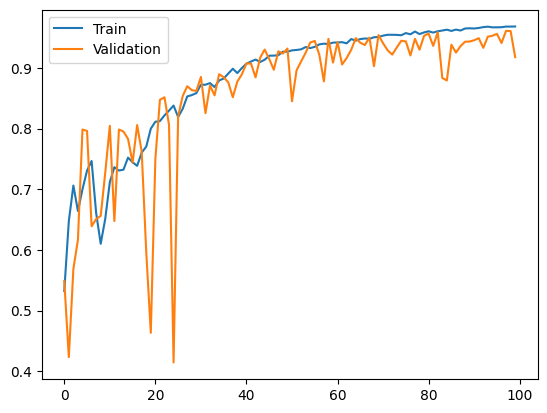

In [14]:
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [15]:
model_post = load_model(r"rutan_classification_2023-09-17.hdf5")

In [17]:
model_post.evaluate(test_generator)

296/519 [================>.............] - ETA: 2:35 - loss: 0.1460 - accuracy: 0.9514

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


346/519 [===================>..........] - ETA: 1:55 - loss: 0.1437 - accuracy: 0.9520

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


519/519 [==============================] - 314s 604ms/step - loss: 0.1362 - accuracy: 0.9540


[0.13620419800281525, 0.9540306329727173]

In [18]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

In [19]:
imagen = load_img('bird.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 1s 1s/step
[[9.9884427e-01 4.2865036e-06 2.3009602e-06 9.1561291e-04 2.3350588e-04]]
Pájaro


In [20]:
imagen = load_img('cat.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 23ms/step
[[1.0889577e-04 9.9982542e-01 3.0683026e-05 1.5000262e-05 2.0012167e-05]]
Gato


In [21]:
imagen = load_img('dog.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 25ms/step
[[1.6782249e-07 1.3110152e-07 9.9999809e-01 9.8000177e-09 1.5488271e-06]]
Perro


In [24]:
imagen = load_img('fish.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 24ms/step


[[0.01810803 0.00475466 0.885582   0.00144786 0.09010744]]
Perro


In [23]:
imagen = load_img('wild.jpg', target_size=(128, 128))

imagen = img_to_array(imagen)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.

prediccion = model_post.predict(imagen)
print(prediccion)
print(clases[np.argmax(prediccion)])

1/1 [==============================] - 0s 25ms/step
[[2.7543417e-01 2.7631661e-03 5.6934380e-04 1.5416812e-03 7.1969163e-01]]
Salvaje


## Versión final

In [4]:
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los tres modelos desde sus archivos hdf5
model1 = load_model('rutan_classification_2023-09-15.hdf5')
model2 = load_model('rutan_classification_2023-09-16.hdf5')
model3 = load_model('rutan_classification_2023-09-17.hdf5')

# Directorio de las imágenes que deseas clasificar
test_dir = "dataset2/test"

In [5]:
# Cargar y preprocesar las imágenes de prueba
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante: no mezclar las imágenes para que coincidan con las predicciones
)

Found 16598 images belonging to 5 classes.


In [6]:
# Realizar predicciones con los tres modelos
predictions1 = model1.predict(test_generator)
predictions2 = model2.predict(test_generator)
predictions3 = model3.predict(test_generator)

# Calcula el consenso de las predicciones
ensemble_predictions = (predictions1 + predictions2 + predictions3) / 3

281/519 [===============>..............] - ETA: 1:12

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


450/519 [=========================>....] - ETA: 21s

d:\anaconda3\envs\RutaN\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


519/519 [==============================] - 32s 58ms/step


In [7]:
# Clasifica las predicciones finales
final_predictions = np.argmax(ensemble_predictions, axis=1)

# Etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())

# Etiquetas reales
true_labels = test_generator.classes

# Calcula el Accuracy del modelo de ensamble
accuracy = np.mean(final_predictions == true_labels)
print(f'Accuracy del modelo de ensamble: {accuracy * 100:.2f}%')

Accuracy del modelo de ensamble: 98.07%


In [3]:
clases = ["Pájaro", "Gato", "Perro", "Pez", "Salvaje"]

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step
[[8.7040787e+01 1.6315605e-02 8.1026079e-03 1.2329522e+00 1.1701840e+01]]
Pájaro


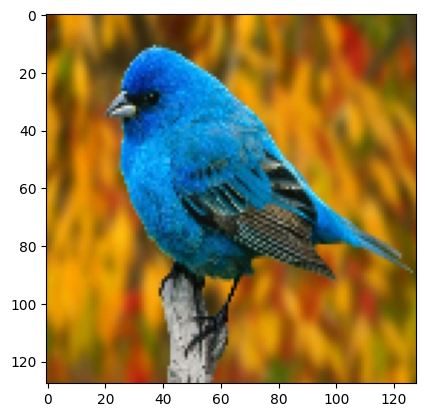

In [8]:
im = load_img('bird.jpg', target_size=(128, 128))
imagen = img_to_array(im)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.
# Realizar predicciones con los tres modelos
predictions1 = model1.predict(imagen)
predictions2 = model2.predict(imagen)
predictions3 = model3.predict(imagen)
# Calcular el promedio de las predicciones para cada imagen
final_predictions = (predictions1 + predictions2 + predictions3) / 3.0
plt.imshow(im)
print(final_predictions * 100)
print(clases[np.argmax(final_predictions)])

1/1 [==============================] - 0s 25ms/step
[[11.972733   73.66056     0.30831498  0.11123206 13.947166  ]]
Gato


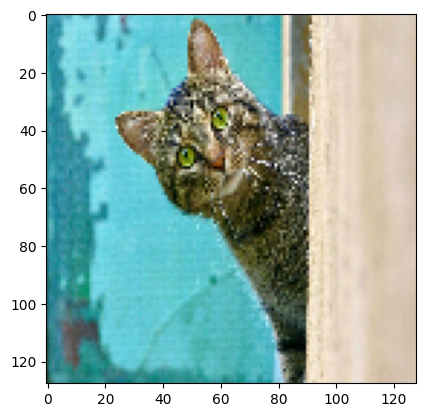

In [47]:
im = load_img('cat.jpg', target_size=(128, 128))
imagen = img_to_array(im)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.
# Realizar predicciones con los tres modelos
predictions1 = model1.predict(imagen)
predictions2 = model2.predict(imagen)
predictions3 = model3.predict(imagen)
# Calcular el promedio de las predicciones para cada imagen
final_predictions = (predictions1 + predictions2 + predictions3) / 3.0
plt.imshow(im)
print(final_predictions * 100)
print(clases[np.argmax(final_predictions)])

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step
[[5.0541671e-04 8.3209097e-04 9.9992516e+01 3.1512443e-04 5.8303750e-03]]
Perro


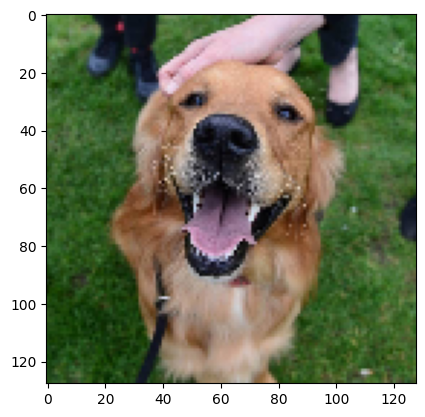

In [46]:
im = load_img('dog.jpg', target_size=(128, 128))
imagen = img_to_array(im)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.
# Realizar predicciones con los tres modelos
predictions1 = model1.predict(imagen)
predictions2 = model2.predict(imagen)
predictions3 = model3.predict(imagen)
# Calcular el promedio de las predicciones para cada imagen
final_predictions = (predictions1 + predictions2 + predictions3) / 3.0
plt.imshow(im)
print(final_predictions * 100)
print(clases[np.argmax(final_predictions)])

1/1 [==============================] - 0s 22ms/step
[[ 1.3628073   0.4591219   0.13650934 91.53828     6.503284  ]]
Pez


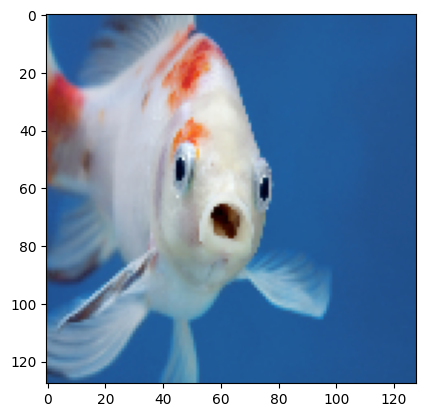

In [45]:
im = load_img('fish.png', target_size=(128, 128))
imagen = img_to_array(im)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.
# Realizar predicciones con los tres modelos
predictions1 = model1.predict(imagen)
predictions2 = model2.predict(imagen)
predictions3 = model3.predict(imagen)
# Calcular el promedio de las predicciones para cada imagen
final_predictions = (predictions1 + predictions2 + predictions3) / 3.0
plt.imshow(im)
print(final_predictions * 100)
print(clases[np.argmax(final_predictions)])

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step
[[9.1845894e+00 1.2858941e-01 3.6757055e-01 5.4517057e-02 9.0264732e+01]]
Salvaje


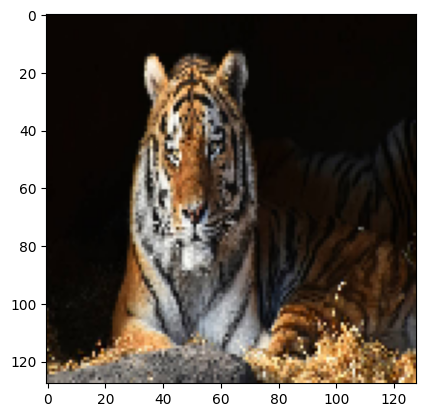

In [49]:
im = load_img('wild.jpg', target_size=(128, 128))
imagen = img_to_array(im)
imagen = imagen.reshape((1, imagen.shape[0], imagen.shape[1], imagen.shape[2]))
imagen /= 255.
# Realizar predicciones con los tres modelos
predictions1 = model1.predict(imagen)
predictions2 = model2.predict(imagen)
predictions3 = model3.predict(imagen)
# Calcular el promedio de las predicciones para cada imagen
final_predictions = (predictions1 + predictions2 + predictions3) / 3.0
plt.imshow(im)
print(final_predictions * 100)
print(clases[np.argmax(final_predictions)])